In [251]:
import pandas as pd
import numpy as np

In [252]:
obesity_df = pd.read_csv('Resources/WHO_Obesity_Data_Global.csv')
obesity_df

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
5,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
6,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
7,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]
8,Antigua and Barbuda,18.9 [13.8-24.6],11.6 [6.4-18.6],25.9 [17.6-35.2],18.4 [13.5-23.8],11.2 [6.2-17.8],25.3 [17.3-34.3],18.0 [13.2-23.1],10.8 [6.1-17.1],24.8 [17.1-33.5],...,9.6 [5.0-16.1],6.0 [3.4-9.5],2.5 [0.9-5.4],9.3 [4.7-15.9],5.8 [3.2-9.3],2.4 [0.8-5.3],9.1 [4.4-15.7],5.6 [3.0-9.1],2.3 [0.8-5.1],8.8 [4.1-15.6]
9,Argentina,28.3 [23.4-33.5],27.3 [20.5-35.0],29.0 [22.5-36.0],27.8 [23.2-32.7],26.8 [20.2-34.1],28.5 [22.3-35.1],27.3 [22.9-32.0],26.2 [20.0-33.1],28.1 [22.1-34.4],...,14.1 [9.0-20.5],11.8 [8.2-16.0],9.6 [5.2-15.4],13.8 [8.6-20.3],11.5 [7.8-15.8],9.3 [4.9-15.3],13.5 [8.1-20.2],11.2 [7.5-15.7],9.0 [4.6-15.2],13.2 [7.7-20.1]


In [253]:
# Clean up on aisle 3
obesity_df.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
obesity_df.set_index(obesity_df['Country'], inplace=True)
obesity_df = obesity_df.iloc[3:]
obesity_df.drop(columns=['Country'], inplace=True)
obesity_df.head()

/Users/jamespelham/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],4.7 [2.9-6.9],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],19.9 [15.7-24.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],25.3 [20.9-30.1],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],25.0 [20.0-30.3],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],7.1 [4.4-10.6],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]


In [254]:
# More clean up but with loop this time...so talented
column_list = obesity_df.columns
for column in column_list:
    if '.' in column:
        obesity_df.drop(columns=[column], inplace=True)
obesity_df

,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.5 [3.4-8.1],5.2 [3.3-7.7],4.9 [3.1-7.3],4.7 [2.9-6.9],4.4 [2.8-6.6],4.2 [2.6-6.2],4.0 [2.5-5.9],3.8 [2.4-5.6],3.6 [2.2-5.4],3.4 [2.1-5.1],...,0.9 [0.4-1.7],0.8 [0.4-1.6],0.8 [0.4-1.5],0.7 [0.3-1.4],0.7 [0.3-1.4],0.6 [0.3-1.3],0.6 [0.2-1.3],0.6 [0.2-1.2],0.5 [0.2-1.1],0.5 [0.2-1.1]
Albania,21.7 [17.0-26.7],21.1 [16.6-26.0],20.5 [16.2-25.1],19.9 [15.7-24.4],19.3 [15.3-23.7],18.8 [14.8-23.0],18.2 [14.3-22.3],17.6 [13.8-21.6],17.0 [13.4-21.0],16.5 [12.9-20.3],...,8.3 [5.5-11.8],8.0 [5.3-11.6],7.8 [5.1-11.4],7.6 [4.9-11.2],7.4 [4.6-11.0],7.2 [4.4-10.9],7.0 [4.2-10.8],6.8 [4.0-10.7],6.7 [3.8-10.6],6.5 [3.6-10.5]
Algeria,27.4 [22.5-32.7],26.7 [21.9-31.8],26.0 [21.4-30.9],25.3 [20.9-30.1],24.7 [20.4-29.2],24.0 [19.9-28.4],23.3 [19.3-27.6],22.7 [18.8-26.8],22.0 [18.2-26.1],21.4 [17.6-25.4],...,9.7 [6.6-13.3],9.4 [6.2-12.9],9.0 [5.9-12.6],8.6 [5.5-12.3],8.3 [5.2-12.0],8.0 [4.9-11.7],7.7 [4.6-11.4],7.4 [4.3-11.3],7.2 [4.1-11.1],6.9 [3.9-10.9]
Andorra,25.6 [20.1-31.3],25.4 [20.1-31.0],25.2 [20.0-30.7],25.0 [20.0-30.3],24.8 [19.9-30.0],24.6 [19.8-29.8],24.4 [19.7-29.5],24.2 [19.5-29.3],24.0 [19.4-29.0],23.8 [19.2-28.7],...,17.4 [12.9-22.3],16.9 [12.5-21.9],16.5 [12.1-21.5],16.0 [11.6-21.0],15.5 [11.1-20.6],15.0 [10.6-20.1],14.5 [10.1-19.6],14.0 [9.6-19.1],13.5 [9.1-18.6],12.9 [8.6-18.1]
Angola,8.2 [5.1-12.2],7.9 [4.9-11.7],7.5 [4.7-11.2],7.1 [4.4-10.6],6.8 [4.2-10.1],6.5 [4.0-9.7],6.2 [3.8-9.2],5.9 [3.6-8.8],5.6 [3.4-8.4],5.3 [3.2-8.0],...,1.4 [0.6-2.7],1.3 [0.6-2.6],1.3 [0.5-2.5],1.2 [0.5-2.4],1.1 [0.4-2.3],1.1 [0.4-2.2],1.0 [0.4-2.1],0.9 [0.3-2.0],0.9 [0.3-2.0],0.8 [0.3-1.9]
Antigua and Barbuda,18.9 [13.8-24.6],18.4 [13.5-23.8],18.0 [13.2-23.1],17.5 [12.9-22.5],17.1 [12.6-21.9],16.7 [12.4-21.3],16.2 [12.1-20.8],15.9 [11.8-20.3],15.5 [11.5-19.8],15.1 [11.2-19.3],...,7.6 [4.9-11.0],7.4 [4.7-10.7],7.1 [4.4-10.5],6.9 [4.2-10.3],6.6 [4.0-10.0],6.4 [3.8-9.8],6.2 [3.6-9.6],6.0 [3.4-9.5],5.8 [3.2-9.3],5.6 [3.0-9.1]
Argentina,28.3 [23.4-33.5],27.8 [23.2-32.7],27.3 [22.9-32.0],26.8 [22.6-31.3],26.3 [22.2-30.7],25.8 [21.9-30.1],25.3 [21.4-29.4],24.8 [21.1-28.8],24.4 [20.7-28.3],23.9 [20.3-27.7],...,14.2 [10.9-18.0],13.8 [10.5-17.7],13.5 [10.0-17.4],13.1 [9.7-17.1],12.8 [9.3-16.8],12.5 [8.9-16.5],12.1 [8.6-16.3],11.8 [8.2-16.0],11.5 [7.8-15.8],11.2 [7.5-15.7]
Armenia,20.2 [15.7-24.8],19.7 [15.4-24.2],19.2 [15.1-23.6],18.8 [14.8-23.0],18.3 [14.5-22.4],17.9 [14.2-21.9],17.5 [13.9-21.4],17.1 [13.6-21.0],16.7 [13.3-20.5],16.4 [12.9-20.1],...,9.8 [6.6-13.6],9.5 [6.3-13.3],9.3 [6.1-13.1],9.0 [5.9-12.8],8.7 [5.6-12.6],8.4 [5.3-12.4],8.1 [5.0-12.2],7.9 [4.8-11.9],7.6 [4.5-11.7],7.3 [4.2-11.5]
Australia,29.0 [25.3-32.9],28.4 [24.9-32.1],27.9 [24.6-31.4],27.3 [24.2-30.6],26.7 [23.8-29.9],26.2 [23.4-29.2],25.6 [23.0-28.6],25.1 [22.5-27.9],24.6 [22.1-27.2],24.0 [21.6-26.6],...,13.1 [11.0-15.4],12.8 [10.7-15.2],12.5 [10.3-14.9],12.2 [10.0-14.6],11.9 [9.6-14.4],11.6 [9.3-14.1],11.3 [8.9-13.9],11.0 [8.6-13.8],10.8 [8.2-13.5],10.5 [7.9-13.4]


In [255]:
# Now for a bit of Regex
obesity_df = obesity_df.replace(to_replace='\[.*$', value='', regex=True)
obesity_df

,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.5,5.2,4.9,4.7,4.4,4.2,4.0,3.8,3.6,3.4,...,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.5
Albania,21.7,21.1,20.5,19.9,19.3,18.8,18.2,17.6,17.0,16.5,...,8.3,8.0,7.8,7.6,7.4,7.2,7.0,6.8,6.7,6.5
Algeria,27.4,26.7,26.0,25.3,24.7,24.0,23.3,22.7,22.0,21.4,...,9.7,9.4,9.0,8.6,8.3,8.0,7.7,7.4,7.2,6.9
Andorra,25.6,25.4,25.2,25.0,24.8,24.6,24.4,24.2,24.0,23.8,...,17.4,16.9,16.5,16.0,15.5,15.0,14.5,14.0,13.5,12.9
Angola,8.2,7.9,7.5,7.1,6.8,6.5,6.2,5.9,5.6,5.3,...,1.4,1.3,1.3,1.2,1.1,1.1,1.0,0.9,0.9,0.8
Antigua and Barbuda,18.9,18.4,18.0,17.5,17.1,16.7,16.2,15.9,15.5,15.1,...,7.6,7.4,7.1,6.9,6.6,6.4,6.2,6.0,5.8,5.6
Argentina,28.3,27.8,27.3,26.8,26.3,25.8,25.3,24.8,24.4,23.9,...,14.2,13.8,13.5,13.1,12.8,12.5,12.1,11.8,11.5,11.2
Armenia,20.2,19.7,19.2,18.8,18.3,17.9,17.5,17.1,16.7,16.4,...,9.8,9.5,9.3,9.0,8.7,8.4,8.1,7.9,7.6,7.3
Australia,29.0,28.4,27.9,27.3,26.7,26.2,25.6,25.1,24.6,24.0,...,13.1,12.8,12.5,12.2,11.9,11.6,11.3,11.0,10.8,10.5


In [256]:
# Check for null values in the dataset
def num_missing(x):
    return sum(x.isnull())
# Apply Per Column
print ("Missing values per column:")
print (obesity_df.apply(num_missing, axis=0))

Missing values per column:
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2005    0
2004    0
2003    0
2002    0
2001    0
2000    0
1999    0
1998    0
1997    0
1996    0
1995    0
1994    0
1993    0
1992    0
1991    0
1990    0
1989    0
1988    0
1987    0
1986    0
1985    0
1984    0
1983    0
1982    0
1981    0
1980    0
1979    0
1978    0
1977    0
1976    0
1975    0
dtype: int64


In [257]:
# Check the dtypes
obesity_df.dtypes

2016    object
2015    object
2014    object
2013    object
2012    object
2011    object
2010    object
2009    object
2008    object
2007    object
2006    object
2005    object
2004    object
2003    object
2002    object
2001    object
2000    object
1999    object
1998    object
1997    object
1996    object
1995    object
1994    object
1993    object
1992    object
1991    object
1990    object
1989    object
1988    object
1987    object
1986    object
1985    object
1984    object
1983    object
1982    object
1981    object
1980    object
1979    object
1978    object
1977    object
1976    object
1975    object
dtype: object

In [258]:
# Convert dtypes into floats
for column in obesity_df:
    obesity_df[column] = pd.to_numeric(obesity_df[column], errors='coerce')
    obesity_df[column] = obesity_df[column].round(3)
    obesity_df[column].dropna(axis=0, inplace=True)
    obesity_df[column] = obesity_df[column].astype(float)

In [259]:
obesity_df['2015'].describe()

count    191.000000
mean      19.508377
std       11.313017
min        2.000000
25%        9.150000
50%       20.200000
75%       25.200000
max       60.700000
Name: 2015, dtype: float64

In [260]:
oo = obesity_df['2015']
obesity_top_50 = oo.to_frame()
obesity_top_50.rename(index={'United States of America':'United States', 'Czechia':'Czech Republic'}, inplace=True)

In [261]:
suicide_df = pd.read_csv('Suicide_Percentage_Breakdown.csv')
suicide_df

,country,Percentage of Suicide,suicides_no,population
0,Lithuania,0.041182,28039,68085210
1,Russian Federation,0.032777,1209742,3690802620
2,Sri Lanka,0.030484,55641,182525626
3,Belarus,0.030345,59892,197372292
4,Hungary,0.029718,73891,248644256
5,Latvia,0.028471,12770,44852640
6,Kazakhstan,0.026899,101546,377513869
7,Slovenia,0.026360,10615,40268619
8,Estonia,0.025965,7034,27090810
9,Ukraine,0.024870,319950,1286469184


In [262]:
suicide_df.rename(columns={'country':'Country'}, inplace=True)
suicide_df.set_index('Country')
suicide_df.head(50)

,Country,Percentage of Suicide,suicides_no,population
0,Lithuania,0.041182,28039,68085210
1,Russian Federation,0.032777,1209742,3690802620
2,Sri Lanka,0.030484,55641,182525626
3,Belarus,0.030345,59892,197372292
4,Hungary,0.029718,73891,248644256
5,Latvia,0.028471,12770,44852640
6,Kazakhstan,0.026899,101546,377513869
7,Slovenia,0.026360,10615,40268619
8,Estonia,0.025965,7034,27090810
9,Ukraine,0.024870,319950,1286469184


In [263]:
suicide_obesity_df = suicide_df.join(obesity_top_50, on='Country')
suicide_obesity_df.dropna(inplace=True)
suicide_obesity_df.head(50)

,Country,Percentage of Suicide,suicides_no,population,2015
0,Lithuania,0.041182,28039,68085210,26.0
1,Russian Federation,0.032777,1209742,3690802620,22.8
2,Sri Lanka,0.030484,55641,182525626,4.9
3,Belarus,0.030345,59892,197372292,24.1
4,Hungary,0.029718,73891,248644256,25.9
5,Latvia,0.028471,12770,44852640,23.3
6,Kazakhstan,0.026899,101546,377513869,20.5
7,Slovenia,0.026360,10615,40268619,19.8
8,Estonia,0.025965,7034,27090810,20.9
9,Ukraine,0.024870,319950,1286469184,23.7


In [264]:
suicide_obesity_df['2015'].describe()

count    95.000000
mean     22.076842
std       6.809465
min       4.100000
25%      19.700000
50%      22.100000
75%      25.700000
max      45.300000
Name: 2015, dtype: float64

In [265]:
suicide_2015 = pd.read_csv('Suicide_Percentage_Breakdown_2015.csv')

In [266]:
suicide_2015.rename(columns={'country':'Country'}, inplace=True)
suicide_2015.sort_values(by=['Percentage of Suicide'],ascending=False, inplace=True)
suicide_2015.set_index('Country')

,Percentage of Suicide
Country,
Lithuania,0.032535
Republic of Korea,0.027757
Slovenia,0.021590
Latvia,0.020634
Hungary,0.019895
Uruguay,0.019744
Japan,0.019183
Ukraine,0.018773
Russian Federation,0.018561


In [267]:
suicide_obesity_2015 = suicide_2015.join(obesity_top_50, on='Country')

In [268]:
suicide_obesity_2015.set_index('Country', inplace=True)
suicide_obesity_2015

,Percentage of Suicide,2015
Country,,
Lithuania,0.032535,26.0
Republic of Korea,0.027757,4.5
Slovenia,0.021590,19.8
Latvia,0.020634,23.3
Hungary,0.019895,25.9
Uruguay,0.019744,27.5
Japan,0.019183,4.1
Ukraine,0.018773,23.7
Russian Federation,0.018561,22.8


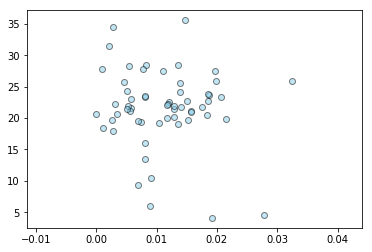

In [273]:
import matplotlib.pyplot as plt
plt.scatter(y=suicide_obesity_2015['2015'], x=suicide_obesity_2015['Percentage of Suicide'], color='skyblue', alpha=0.5, edgecolor='black')

In [270]:
s15

,Percentage of Suicide,2015
Country,,
Lithuania,0.032535,26.0
Republic of Korea,0.027757,4.5
Slovenia,0.021590,19.8
Latvia,0.020634,23.3
Hungary,0.019895,25.9
Uruguay,0.019744,27.5
Japan,0.019183,4.1
Ukraine,0.018773,23.7
Russian Federation,0.018561,22.8


In [ ]:
# Gender Obesity Rates
